Importing packages

In [25]:
# Data
import pandas as pd

# Common
import numpy as np
import re
import tensorflow as tf

# Model
from keras.utils import plot_model
from keras import backend as K
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification


#sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_curve, auc, confusion_matrix, classification_report, PrecisionRecallDisplay


# Data/Result visualization
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

Function for expanding abbreviations

In [3]:
def deabbreviate(text):
    text = text.upper()
    text = re.sub(r'bAFAIKb', ' As Far As I Know ',text)
    text = re.sub(r'bAFKb', ' From Keyboard ',text)
    text = re.sub(r'bASAPb', ' As Soon As Possible ',text)
    text = re.sub(r'bATKb', ' At The Keyboard ',text)
    text = re.sub(r'bA3b', ' Anytime, Anywhere, Anyplace ',text)
    text = re.sub(r'bBAKb', ' Back At Keyboard ',text)
    text = re.sub(r'bBBLb', ' Be Back Later ',text)
    text = re.sub(r'bBBSb', ' Be Back Soon ',text)
    text = re.sub(r'bBFNb', ' Bye For Now ',text)
    text = re.sub(r'bBRBb', ' Be Right Back ',text)
    text = re.sub(r'bBRTb', ' Be Right There ',text)
    text = re.sub(r'bBTWb', ' By The Way ',text)
    text = re.sub(r'bB4b', ' Before ',text)
    text = re.sub(r'bB4Nb', ' Bye For Now ',text)
    text = re.sub(r'bCUb', ' See You ',text)
    text = re.sub(r'bCUL8Rb', ' See You Later ',text)
    text = re.sub(r'bCYAb', ' See You ',text)
    text = re.sub(r'bFAQb', ' Frequently Asked Questions ',text)
    text = re.sub(r'bFYIb', ' For Your Information ',text)
    text = re.sub(r'bGNb', ' Good Night ',text)
    text = re.sub(r'bGR8b', ' Great ',text)
    text = re.sub(r'bICb', ' I See ',text)
    text = re.sub(r'bLOLb', ' Laughing Out Loud ',text)
    text = re.sub(r'bL8Rb', ' Later ',text)
    text = re.sub(r'bM8b', ' Mate ',text)
    text = re.sub(r'bTHXb', ' Thank You ',text)
    text = re.sub(r'bTTFNb', ' BYE ',text)
    text = re.sub(r'bTTFNb', ' BYE ',text)
    text = re.sub(r'bUb', ' You ',text)
    text = re.sub(r'bU2b', ' You TOO ',text)
    text = re.sub(r'bWTFb', ' What The Heck ',text)
    text = re.sub(r'bW8b', ' Wait ',text)
    text = re.sub(r'bFAVb', ' Favourite ',text)
    text = re.sub(r'bHWYb'," highway ",text)
    text = re.sub(r'bPPLb'," people ",text)
    text = re.sub(r'bGVb'," give ",text)
    text = re.sub(r'bWANNAb'," want to ",text)
    text = text.lower()
    return text

Functions to convert string to ascii string

In [4]:
def return_ascii(text):
    ret_str = ""
    for char in list(text):
        if char.isascii():
            ret_str += char
    return ret_str

Function to clean text

In [5]:
punctuations = '!"#$%&()\'*+,-./:;?@[]^_`{|}~'
def preprocess(text):
    #1.Removing AM and PM
    text = re.sub(r'b[AP]{1}Mb'," ",text)
    #2.Lowercasing
    text = text.lower()
    #3.removing mentions
    text =re.sub(r'@[^ ]+',' ',text)
    #4.removing urls
    text = re.sub(r'https*://t.co/w+',' ',text)
    text = re.sub(r'https*://[^ ]+',' ',text)
    #5.De-abbreviating
    text = deabbreviate(text)
    #6.cleaning mscl
    text = re.sub(r"åê"," ",text)
    text = re.sub(r'&[^ ]+'," ",text)
    text = re.sub(r'b[a-z]+-[0-9]+b'," ",text)
    text = re.sub(r'bd+[a-z]+d+b'," ",text)
    text = re.sub(r'brtb'," ",text)
    text = re.sub(r'bfavb'," ",text)
    text = re.sub(r'b[h]{1}a[ha]+b',"haa",text)
    text = re.sub(r'b[a-z]+d+[a-z]+b'," ",text)
    #7.removing months
    text = re.sub(r" jan | feb | mar | apr | may | jun | jul | aug | sep | oct | nov | dec ",' ',text)
    #8.decontracting
    text = re.sub(r"aren't",'are not',text)
    text = re.sub(r"won't",' will not ',text)
    text = re.sub(r"bi'mb",' I am ',text)
    text = re.sub(r"bi'db",' I would ',text)
    text = re.sub(r"bit'sb",' it is ',text)
    text = re.sub(r"bthat'sb",' that is ',text)
    text = re.sub(r"bcan'tb",' can not ',text)
    text = re.sub(r"bi'veb",' I have ',text)
    text = re.sub(r"bthere'sb",' there is ',text)
    text = re.sub(r"bdidn'tb",' did not ',text)
    text = re.sub(r"bcouldn'tb",' could not ',text)
    text = re.sub(r"bisn'tb",' is not ',text)
    text = re.sub(r"bwe'reb", ' we are ',text)
    text = re.sub(r"bthey'reb",' they are ',text)
    text = re.sub(r"bdon'tb",' do not ',text)
    text = re.sub(r"blet'sb",' let us ',text)
    text = re.sub(r"bli'lb",' little ',text)
    text = re.sub(r"bshe'sb",' she is ',text)
    text = re.sub(r"bhe'sb",' he is ',text)
    text = re.sub(r"bhow'reb",' How are ',text)
    text = re.sub(r"wasn't",' was not ',text)
    text = re.sub(r"bwhat'sb",' what is ',text)
    text = re.sub(r"bhe'llb",' he will ',text)
    text = re.sub(r"bi'llb",' i will ',text)
    text = re.sub(r"bshe'llb",' she will ',text)
    text = re.sub(r"byou'llb",' you will ',text)
    text = re.sub(r"byou'reb",' you are ',text)
    text = re.sub(r"bwe'veb",' we have ',text)
    text = re.sub(r"byou'veb",' you have ',text)
    text = re.sub(r"bthey'veb",' they have ',text)
    #10.Removing the punctuations
    for p in punctuations:
        text = text.replace(p,"   ")
    #11.removing certain patters
    text = re.sub(r'lo+l',"laughing out loud",text)
    text = re.sub(r'coo+l',"cool",text)
    text = re.sub(r'go+a+l+','goal',text)
    text = re.sub(r'so+',"so",text)
    text = re.sub(r'bo+h+o*b','oh',text)
    #12.Removing the digits
    text = re.sub(r'\d+'," ",text)
    #13.New line as space
    text = re.sub(r'\n'," ",text)
    #14.Removing extra spaces
    text = re.sub(r'[ ]+'," ",text)
    #15.Stripping the end parts
    text = text.strip()
    #16.removing the accents
    text = return_ascii(text)
    #17.removing certain patterns after getting only the ascii characters
    text = re.sub(r"bcantb",' can not ',text)
    text = re.sub(r"bwontb",' will not ',text)
    text = re.sub(r"bimb",' I am ',text)
    text = re.sub(r"bdidntb",' did not ',text)
    text = re.sub(r"bcouldntb",' could not ',text)
    text = re.sub(r"bisntb",' is not ',text)
    text = re.sub(r"bdontb",' do not ',text)
    text = re.sub(r"blilb",' little ',text)
    text = re.sub(r"balilb",' a little ',text)
    text = re.sub(r"view and download video",' ',text)
    text = re.sub(r"bviaZ",' ',text)
    #18.Removing words with lengths less than 2
    text = [ele for ele in text.split(" ") if len(ele) > 1 ]
    text = " ".join(text)
    return text

Reading training dataset

In [6]:
df = pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")
df = df.loc[:,['text','target']]
df['text'] = df['text'].apply(preprocess)

Dropping rows that have null text values

In [7]:
df.dropna(subset=['text'],inplace=True)

Dropping duplicate data with ambiguous target labels

In [8]:
df_dup = df[df['text'].duplicated()]
text_arr = np.unique(df_dup['text'].values)
df_dup = df[df['text'].isin(text_arr)].sort_values(by=['text'])
df_dup = df_dup[~df_dup.duplicated()].sort_values(by=['text'])
df_dup_contradiction = df_dup[df_dup['text'].duplicated()]
df_dup_contradiction.to_csv("ambiguous_datapoints_bert.csv")
df_dedup = df.drop_duplicates(subset=['text'])
df_dedup = df_dedup[~df_dedup['text'].isin(df_dup_contradiction['text'].values)]

In [9]:
df_dedup.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6755 entries, 0 to 7606
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    6755 non-null   object
 1   target  6755 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 158.3+ KB


WordCloud for positively labeled data(Disaster)

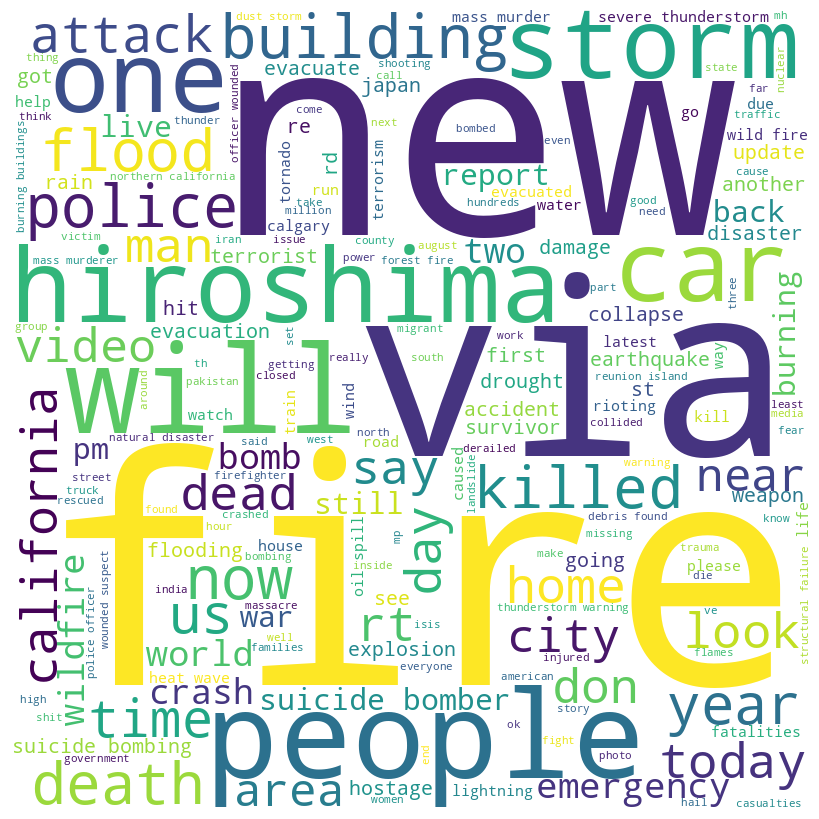

In [10]:
positive_sentences = ""
for sentence in df_dedup[df_dedup['target'] == 1]['text'].tolist():
    positive_sentences = positive_sentences + " "+sentence
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(positive_sentences)
# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

WordCloud for negatively labeled data (Not disaster)

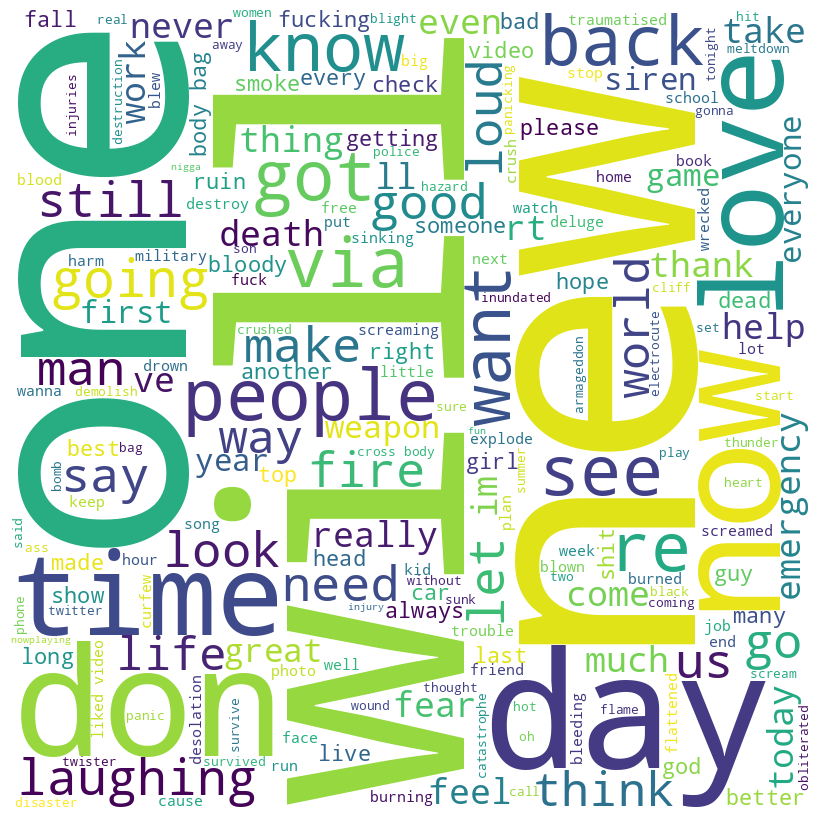

In [11]:
negative_sentences = ""
for sentence in df_dedup[df_dedup['target'] == 0]['text'].tolist():
    negative_sentences = negative_sentences + " "+sentence
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(negative_sentences)
# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

Splitting train-test data

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df_dedup['text'],df_dedup['target'], stratify=df_dedup['target'],random_state=35,test_size=0.1)

Tokenization

In [13]:
tokenizer = AutoTokenizer.from_pretrained("roberta-base") #Tokenizer
train_inputs = tokenizer(X_train.tolist(), padding=True, truncation=True, return_tensors='tf') #Tokenized text
train_labels = y_train
test_inputs = tokenizer(X_test.tolist(), padding=True, truncation=True, return_tensors='tf') #Tokenized text
test_labels = y_test

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Defining metric functions

In [14]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def specificity_m(y_true, y_pred):
    true_negatives = K.sum(K.round(K.clip((1 - y_true) * (1 - y_pred), 0, 1)))
    possible_negatives = K.sum(K.round(K.clip(1 - y_true, 0, 1)))
    return true_negatives / (possible_negatives + K.epsilon())

Training

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaForSequenceClassification: ['roberta.embeddings.position_ids']
- This IS expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predicti

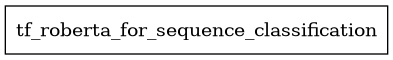

In [15]:
model = TFAutoModelForSequenceClassification.from_pretrained("roberta-base", num_labels=2)
model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5, clipnorm=1.),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[tf.metrics.SparseCategoricalAccuracy(), f1_m, precision_m, recall_m, specificity_m],
        )
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [18]:
history=model.fit(dict(train_inputs),train_labels, validation_data=[dict(test_inputs),test_labels], batch_size=32,epochs=3, verbose=1)

Epoch 1/3


I0000 00:00:1707034560.118402     110 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


190/190 [==============================] - 91s 232ms/step - loss: 0.4774 - sparse_categorical_accuracy: 0.7712 - f1_m: 0.4386 - precision_m: 0.3499 - recall_m: 0.6817 - specificity_m: 1.2785 - val_loss: 0.3892 - val_sparse_categorical_accuracy: 0.8358 - val_f1_m: 0.5731 - val_precision_m: 0.4208 - val_recall_m: 0.9173 - val_specificity_m: 1.1486
Epoch 2/3
190/190 [==============================] - 36s 190ms/step - loss: 0.3632 - sparse_categorical_accuracy: 0.8490 - f1_m: 0.5407 - precision_m: 0.3993 - recall_m: 0.8658 - specificity_m: 1.0981 - val_loss: 0.3735 - val_sparse_categorical_accuracy: 0.8373 - val_f1_m: 0.5555 - val_precision_m: 0.4096 - val_recall_m: 0.8838 - val_specificity_m: 1.1413
Epoch 3/3
190/190 [==============================] - 36s 187ms/step - loss: 0.3107 - sparse_categorical_accuracy: 0.8796 - f1_m: 0.5512 - precision_m: 0.4011 - recall_m: 0.9073 - specificity_m: 1.0637 - val_loss: 0.3965 - val_sparse_categorical_accuracy: 0.8402 - val_f1_m: 0.5671 - val_precisi

Defining a function for plotting graphs of loss and f1 scores of training history

In [19]:
def plot_model_hist(history):
    # Plotting train and validation loss graph
    plt.title('Loss')
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'],
    label='test')
    plt.legend()
    plt.savefig('loss_graph.png')
    plt.show()

    # Plotting train and validation accuracy graph
    plt.title('Accuracy')
    plt.plot(history.history['sparse_categorical_accuracy'], label='train')
    plt.plot(history.history['val_sparse_categorical_accuracy'],
    label='test')
    plt.legend()
    plt.savefig('acc_graph.png')
    plt.show()
    
    # Plotting train and validation recall graph
    plt.title('Recall')
    plt.plot(history.history['recall_m'], label='train')
    plt.plot(history.history['val_recall_m'],
    label='test')
    plt.legend()
    plt.savefig('recall_graph.png')
    plt.show()
    
    # Plotting train and validation precision graph
    plt.title('Precision')
    plt.plot(history.history['precision_m'], label='train')
    plt.plot(history.history['val_precision_m'],
    label='test')
    plt.legend()
    plt.savefig('precision_graph.png')
    plt.show()

    # Plotting train and validation specificity graph
    plt.title('Specificity')
    plt.plot(history.history['specificity_m'], label='train')
    plt.plot(history.history['val_specificity_m'],
    label='test')
    plt.legend()
    plt.savefig('specificity_graph.png')
    plt.show()

    # Plotting train and validation F1 score graph
    plt.title('F1 score')
    plt.plot(history.history['f1_m'], label='train')
    plt.plot(history.history['val_f1_m'],
    label='test')
    plt.legend()
    plt.savefig('f1_graph.png')
    plt.show()

22/22 [==============================] - 1s 61ms/step
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       400
           1       0.86      0.76      0.81       276

    accuracy                           0.85       676
   macro avg       0.85      0.84      0.84       676
weighted avg       0.85      0.85      0.85       676



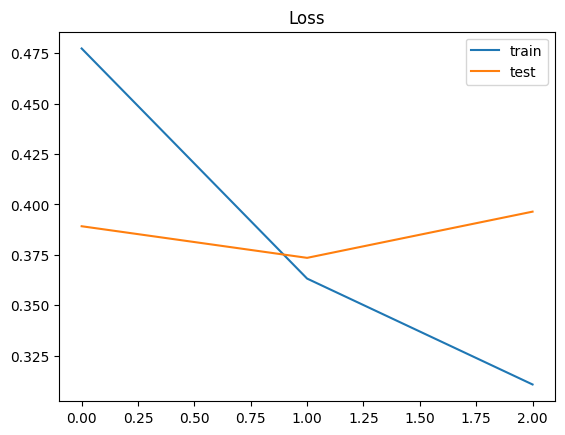

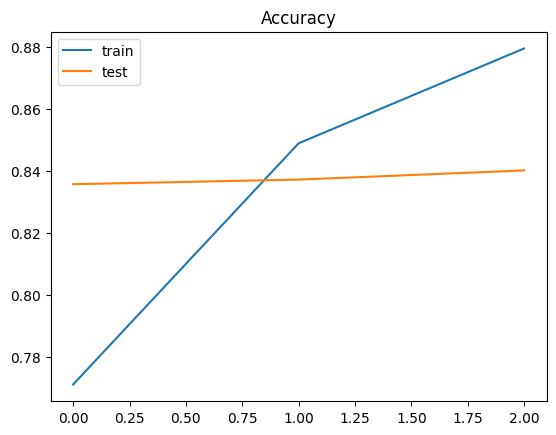

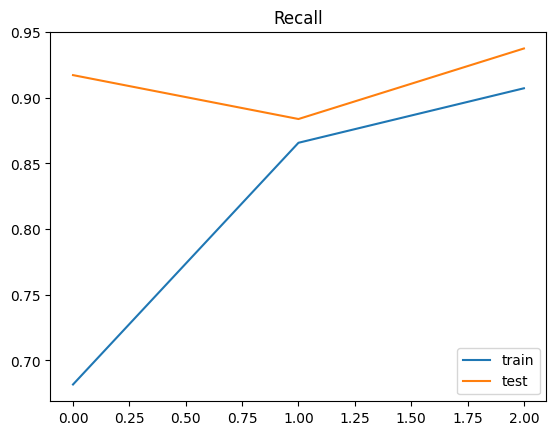

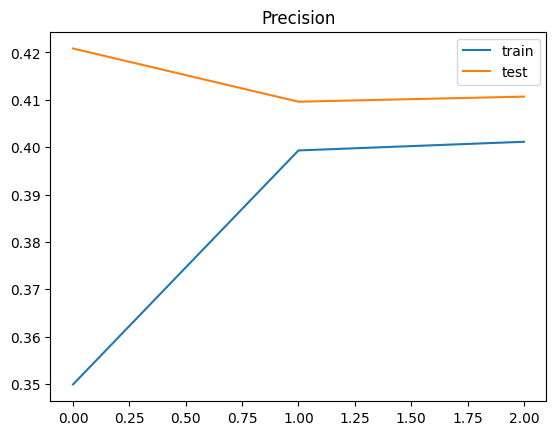

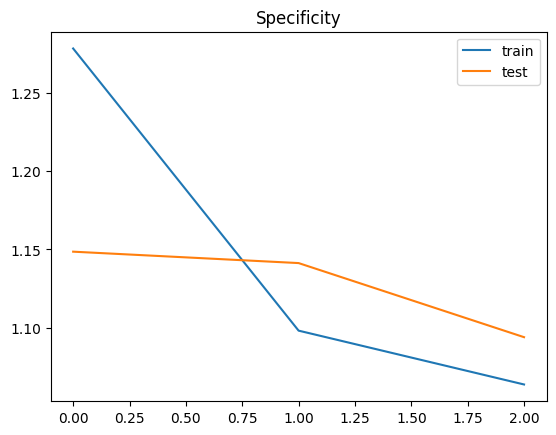

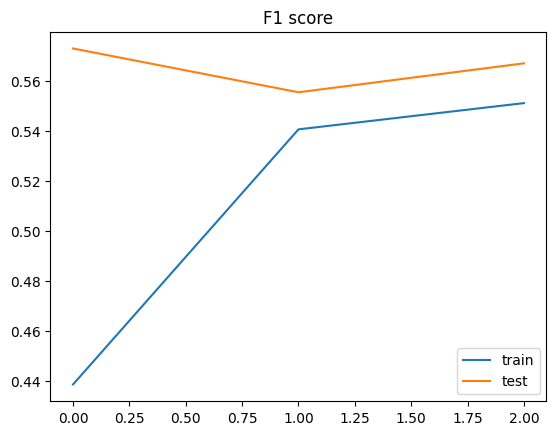

In [20]:
Y_pred = np.argmax(tf.round(tf.nn.sigmoid(model.predict(dict(test_inputs)).logits)), axis=1)
print(classification_report(test_labels, Y_pred))
plot_model_hist(history)

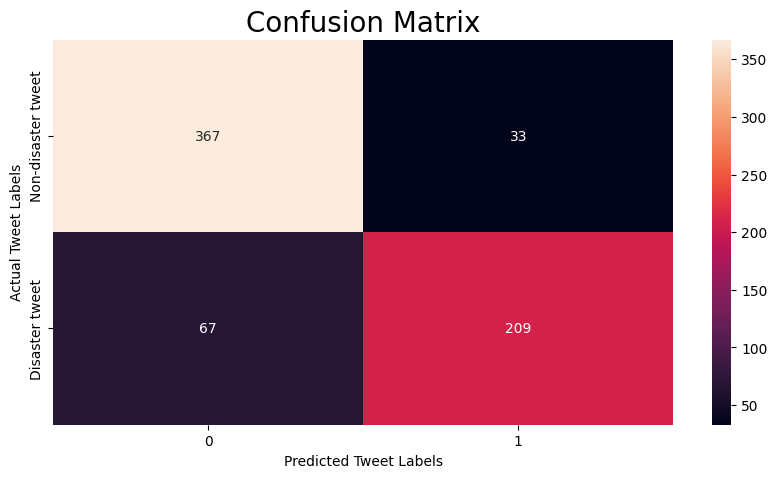

In [24]:
# Generate the confusion matrix that shows the true positive, true neative, false positive, and false negative labels

matrix = confusion_matrix(test_labels, Y_pred)
labels= ["Non-disaster tweet", "Disaster tweet"]
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(matrix, annot=True, fmt="g", ax=ax)
plt.xlabel("Predicted Tweet Labels")
plt.ylabel("Actual Tweet Labels")
plt.title("Confusion Matrix", size=20)
plt.yticks(ticks=[0.5, 1.5], labels=labels)
plt.savefig('confusion_matrix.png')
plt.show()

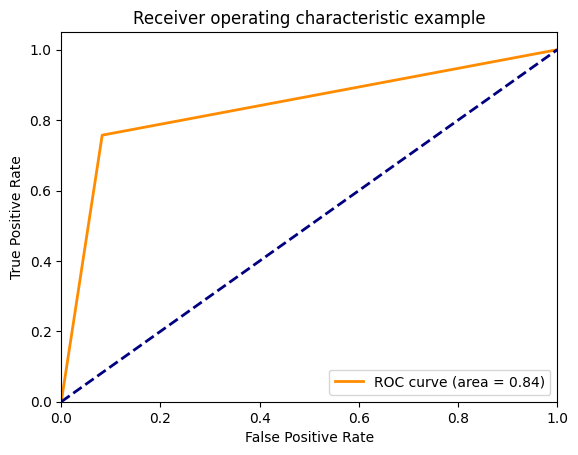

In [26]:
fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_labels, Y_pred)
roc_auc = auc(fpr_keras, tpr_keras)
plt.figure()
lw = 2
plt.plot(
    fpr_keras,
    tpr_keras,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.savefig('roc_curve.png')
plt.show()

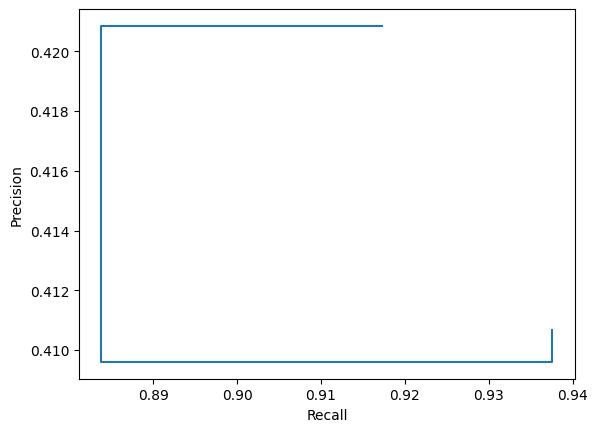

In [27]:
pr = PrecisionRecallDisplay(history.history['val_precision_m'], history.history['val_recall_m'])
pr.plot()
pr.figure_.savefig('pr_curve.png')

Inference

In [28]:
# Get embeddings for test dataframe
df_test = pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")
df_test['text'] = df_test['text'].apply(preprocess)
test_inputs = tokenizer(df_test['text'].tolist(), padding=True, truncation=True, return_tensors='tf') #Tokenized text
predictions = np.argmax(tf.round(tf.nn.sigmoid(model.predict(dict(test_inputs)).logits)), axis=1)

102/102 [==============================] - 10s 66ms/step


Preparing submission

In [29]:
submission_df = pd.read_csv("/kaggle/input/nlp-getting-started/sample_submission.csv")
submission = pd.DataFrame({"id": submission_df['id'],
            "target":predictions})
submission.to_csv('/kaggle/working/submission.csv', index=False)